In [1]:
#Loading Python libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
#Import the dataset
df = pd.read_csv('/content/Postpartum Depression Detection in Bangladesh.csv')


In [3]:
#Drop 'Timestamp' column
df.drop(columns=['Timestamp'], inplace=True)
df.head()

,Age,Education,Residence,Occupation,Household income,Number of family members,Number of children,Child birth process,Weeks of your baby born,Lack of enthusiasm or enjoyment in doing things,...,Poor appetite or overeating,Moving or speaking so slowly or the opposite being so fidgety or restless,Not being able to find humor in things,Blamed yourself unnecessarily when things went wrong,Being tensed or concerned without cause,Experienced fear or panic without a valid basis,So upset that have had trouble sleeping,Felt sad or miserable,Have been crying because of being miserable,Desire to hurt yourself
0,31-35,Ph.D or higher,Urban,Full-time Employee,"50,000-80,000",4,1,Caesarean delivery,25 - 30 weeks,Sometimes,...,Sometimes,Not at all,Not at all,Sometimes,Sometimes,Sometimes,Not at all,Sometimes,Not at all,Not at all
1,31-35,Master's Degree,Urban,Housewife,"25,000-50,000",4,2,Caesarean delivery,18 - 24 weeks,Sometimes,...,Sometimes,Not at all,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Not at all,Sometimes,Sometimes
2,31-35,Master's Degree,Urban,Full-time Employee,"50,000-80,000",6 or more,1,Caesarean delivery,18 - 24 weeks,Most of the time,...,Most of the time,Sometimes,Not at all,Sometimes,Everytime,Most of the time,Sometimes,Sometimes,Sometimes,Sometimes
3,31-35,Master's Degree,Urban,Full-time Employee,"50,000-80,000",5,1,Caesarean delivery,18 - 24 weeks,Most of the time,...,Most of the time,Sometimes,Not at all,Sometimes,Everytime,Everytime,Most of the time,Most of the time,Sometimes,Sometimes
4,26-30,HSC,Urban,Housewife,"<25,000",5,2,Caesarean delivery,18 - 24 weeks,Sometimes,...,Most of the time,Most of the time,Not at all,Most of the time,Everytime,Sometimes,Most of the time,Sometimes,Sometimes,Sometimes


In [5]:
# Map the values
depression_columns = [
    "Lack of enthusiasm or enjoyment in doing things",
    "Feeling down, depressed, or hopeless",
    "Having problems in sleeping",
    "Experience fatigue or low energy",
    "Poor appetite or overeating",
    "Moving or speaking so slowly or the opposite being so fidgety or restless",
    "Not being able to find humor in things",
    "Blamed yourself unnecessarily when things went wrong",
    "Being tensed or concerned without cause",
    "Experienced fear or panic without a valid basis",
    "So upset that have had trouble sleeping",
    "Felt sad or miserable",
    "Have been crying because of being miserable",
    "Desire to hurt yourself"
]

response_mapping = {
    "Not at all": 0,
    "Sometimes": 1,
    "Most of the time": 2,
    "Everytime": 3
}

df[depression_columns] = df[depression_columns].replace(response_mapping)

# Printing only the depression columns
print(df[depression_columns].head())

   Lack of enthusiasm or enjoyment in doing things  \
0                                                1   
1                                                1   
2                                                2   
3                                                2   
4                                                1   

   Feeling down, depressed, or hopeless  Having problems in sleeping  \
0                                     1                            1   
1                                     2                            3   
2                                     2                            1   
3                                     2                            1   
4                                     2                            3   

   Experience fatigue or low energy  Poor appetite or overeating  \
0                                 1                            1   
1                                 2                            1   
2                                 3   

In [6]:
# Calculate Depression Score
df['Depression_Score'] = df[depression_columns].sum(axis=1)

# Classify based on the score range
def classify_depression(score):
    if 0 <= score <= 11:
        return "Low"
    elif 12 <= score <= 17:
        return "Medium"
    elif 18 <= score <= 42:
        return "High"
    else:
        return "Unknown"  # In case of unexpected values

df['Depressive'] = df['Depression_Score'].apply(classify_depression)

# Print the updated dataset with depression score and classification
print("\nUpdated Data with Depression Score and Classification:")
print(df[['Depression_Score', 'Depressive']].head())


Updated Data with Depression Score and Classification:
   Depression_Score Depressive
0                 9        Low
1                16     Medium
2                21       High
3                24       High
4                23       High


Number of respondents:
Low: 93
Medium: 52
High: 19

Percentage of respondents:
Low: 56.71%
Medium: 31.71%
High: 11.59%


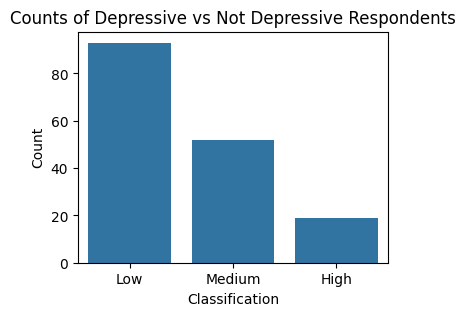

In [8]:
# Count the number
depression_counts = df['Depressive'].value_counts()

# Calculate the percentage of each class
depression_percentage = df['Depressive'].value_counts(normalize=True) * 100

# Print the results
print("Number of respondents:")
print(f"Low: {depression_counts.get('Low', 0)}")
print(f"Medium: {depression_counts.get('Medium', 0)}")
print(f"High: {depression_counts.get('High', 0)}")

print("\nPercentage of respondents:")
print(f"Low: {depression_percentage.get('Low', 0):.2f}%")
print(f"Medium: {depression_percentage.get('Medium', 0):.2f}%")
print(f"High: {depression_percentage.get('High', 0):.2f}%")

# Create a bar plot for the counts
plt.figure(figsize=(4, 3))
sns.barplot(x=depression_counts.index, y=depression_counts.values)
plt.title('Counts of Depressive vs Not Depressive Respondents')
plt.ylabel('Count')
plt.xlabel('Classification')
plt.xticks(rotation=0)
plt.show()

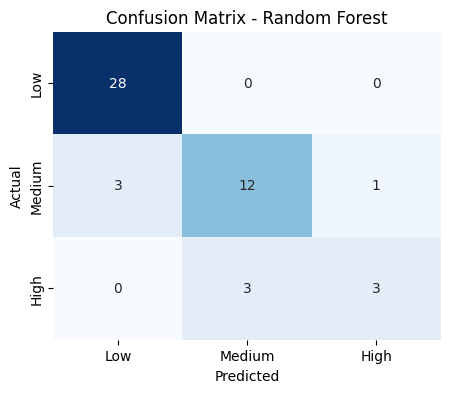


Model: Random Forest
Accuracy: 0.86
Precision (Weighted): 0.8518064516129032
Recall (Weighted): 0.86
F1 Score (Weighted): 0.8512673592126846


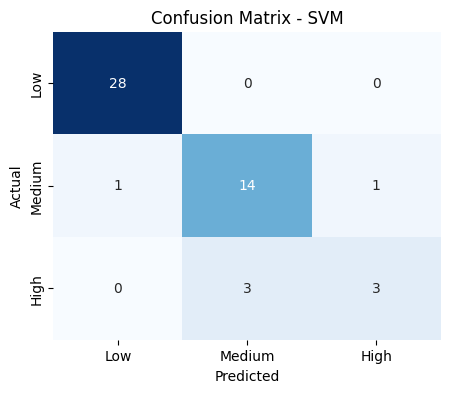


Model: SVM
Accuracy: 0.9
Precision (Weighted): 0.8942190669371197
Recall (Weighted): 0.9
F1 Score (Weighted): 0.8936905901116429


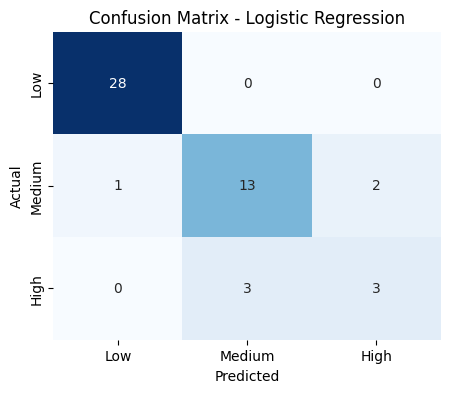


Model: Logistic Regression
Accuracy: 0.88
Precision (Weighted): 0.8726896551724138
Recall (Weighted): 0.88
F1 Score (Weighted): 0.8756299840510366


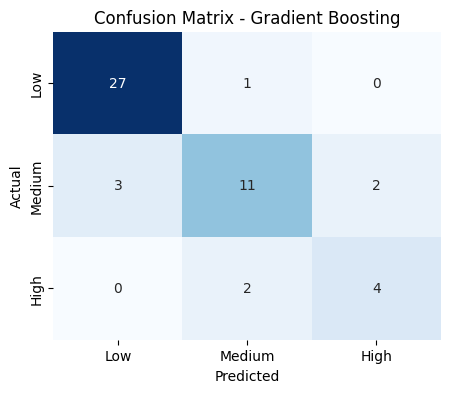


Model: Gradient Boosting
Accuracy: 0.84
Precision (Weighted): 0.8354285714285714
Recall (Weighted): 0.84
F1 Score (Weighted): 0.8360459770114942


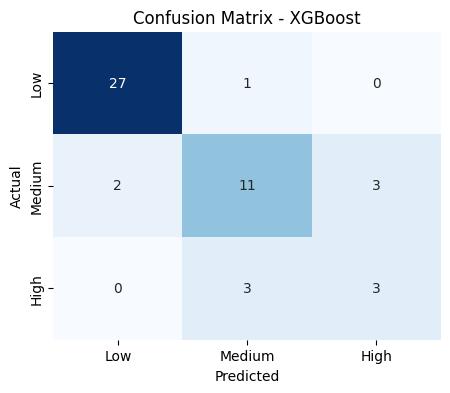


Model: XGBoost
Accuracy: 0.82
Precision (Weighted): 0.8160459770114942
Recall (Weighted): 0.82
F1 Score (Weighted): 0.817623089983022


In [9]:
# Select features (depression columns) and target variable (Depressive)
X = df[depression_columns]
y = df['Depressive'].map({"Low": 0, "Medium": 1, "High": 2})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the models
models = {
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier()  # Add Extreme Gradient Boosting
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Low', 'Medium', 'High'],
                yticklabels=['Low', 'Medium', 'High'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Evaluation metrics
    print(f"\nModel: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision (Weighted):", precision_score(y_test, y_pred, average='weighted'))
    print("Recall (Weighted):", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score (Weighted):", f1_score(y_test, y_pred, average='weighted'))